In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("age_gender.csv")
data.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [4]:
data.info

<bound method DataFrame.info of        age  ethnicity  gender                        img_name  \
0        1          2       0  20161219203650636.jpg.chip.jpg   
1        1          2       0  20161219222752047.jpg.chip.jpg   
2        1          2       0  20161219222832191.jpg.chip.jpg   
3        1          2       0  20161220144911423.jpg.chip.jpg   
4        1          2       0  20161220144914327.jpg.chip.jpg   
...    ...        ...     ...                             ...   
23700   99          0       1  20170120221920654.jpg.chip.jpg   
23701   99          1       1  20170120134639935.jpg.chip.jpg   
23702   99          2       1  20170110182418864.jpg.chip.jpg   
23703   99          2       1  20170117195405372.jpg.chip.jpg   
23704   99          0       1  20170110182052119.jpg.chip.jpg   

                                                  pixels  
0      129 128 128 126 127 130 133 135 139 142 145 14...  
1      164 74 111 168 169 171 175 182 184 188 193 199...  
2      67 

In [5]:
print(pd.isnull(data["age"]).value_counts())
print(pd.isnull(data["gender"]).value_counts())
print(pd.isnull(data["ethnicity"]).value_counts())
print(pd.isnull(data["img_name"]).value_counts())
print(pd.isnull(data["pixels"]).value_counts())

False    23705
Name: age, dtype: int64
False    23705
Name: gender, dtype: int64
False    23705
Name: ethnicity, dtype: int64
False    23705
Name: img_name, dtype: int64
False    23705
Name: pixels, dtype: int64


In [6]:
print(data["ethnicity"].value_counts())

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64


In [7]:
x = data.drop(["age","gender","ethnicity","img_name"], axis = 1)
y = data.drop(["img_name","pixels"], axis = 1)

In [8]:
y.age

0         1
1         1
2         1
3         1
4         1
         ..
23700    99
23701    99
23702    99
23703    99
23704    99
Name: age, Length: 23705, dtype: int64

(array([3413., 2631., 9063., 3140., 2688., 1398.,  854.,  446.,   54.,
          18.]),
 array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
        104.5, 116. ]),
 <BarContainer object of 10 artists>)

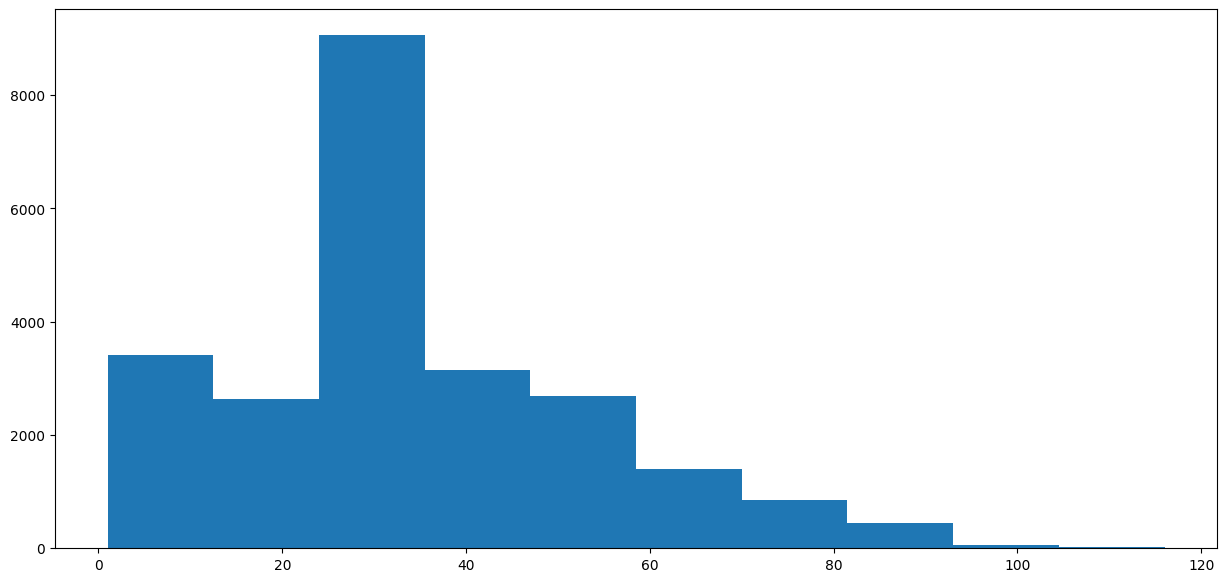

In [9]:
fig, ax = plt.subplots(figsize =(15, 7))
ax.hist(y.age)

(array([12391.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

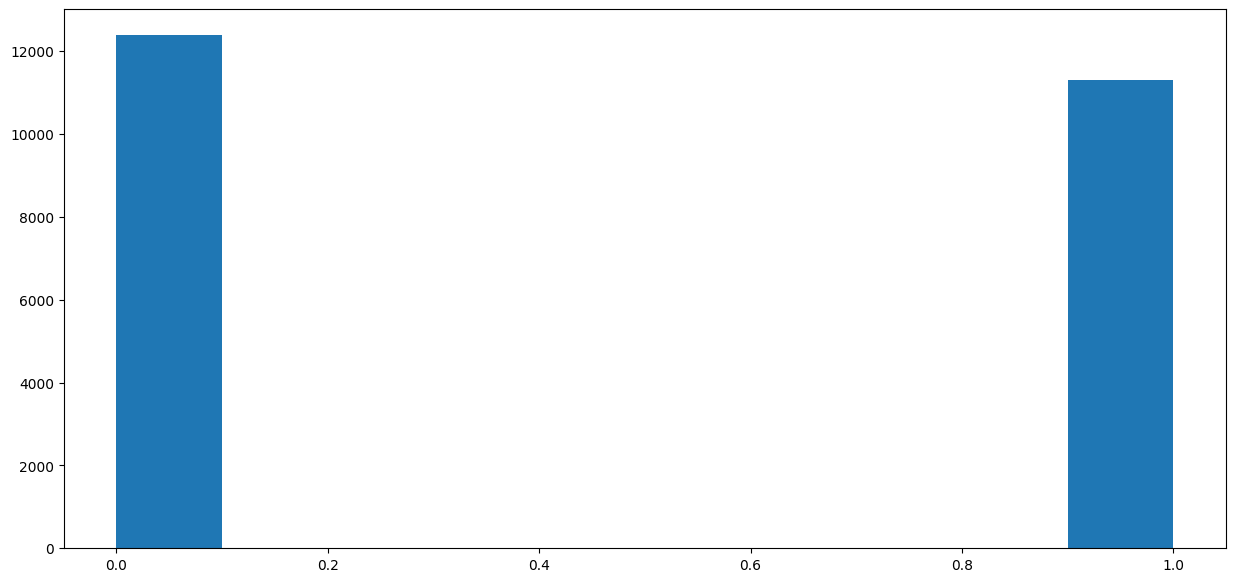

In [10]:
fig, ax = plt.subplots(figsize =(15, 7))
ax.hist(y.gender)

In [11]:
pix_tmp = x['pixels'][0].split(" ")
len_pix = len(pix_tmp)
print(len_pix)
print(np.sqrt(len_pix))

2304
48.0


In [12]:
# Convert "pixels" column of x to a Series
x = pd.Series(x["pixels"])
x = x.str.split(' ')
x = x.apply(lambda row: np.array(row, dtype=int))
x = np.stack(x.to_numpy(), axis=0)
x = x.reshape(-1, 48, 48, 1)

# Print the shape of x
print(x.shape)


(23705, 48, 48, 1)


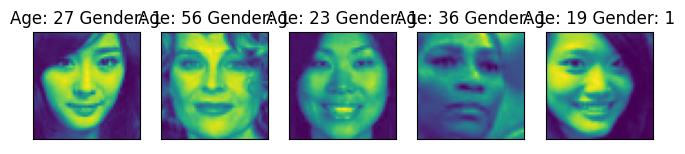

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(8, 8))

for i, ax in enumerate(axs.flat):
    # Define the number of samples in the dataset
    num_samples = 23705
    # Randomly select an index between 0 and num_samples
    idx = np.random.randint(0, num_samples)
    # Display the image corresponding to the selected index
    image = x[idx]
    ax.imshow(image)
    # Configure the plot settings
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    # Set the plot title to include the age and gender information for the selected sample
    age = y['age'].iloc[idx]
    gender = y['gender'].iloc[idx]
    title = f"Age: {age} Gender: {gender}"
    ax.set_title(title)
plt.show()

In [14]:
y["age"] = pd.cut(y["age"],bins=[0,10,20,30,40,50,60,70,80,90,116],labels=["0","1","2","3","4","5","6","7","8","9"])
age = to_categorical(np.array(y["age"]), num_classes = 10)
gender = to_categorical(y["gender"], num_classes = 2)
ethnicity = to_categorical(np.array(y["ethnicity"]), num_classes = 5)
age

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [15]:
x = x / 255.0
x = x / 255.0

In [16]:

datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Disable certain feature-wise and sample-wise normalizations
datagen.featurewise_center = False
datagen.samplewise_center = False
datagen.featurewise_std_normalization = False
datagen.samplewise_std_normalization = False
datagen.zca_whitening = False

# Fit the ImageDataGenerator on the input data x
datagen.fit(x)

In [17]:
x_g_train, x_g_test, y_g_train, y_g_test = train_test_split(x, gender, test_size= 0.28)
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x, age, test_size= 0.28)

In [18]:
def buildmodel(part, method_act, method_loss):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(part, activation=method_act)
    ])

    model.compile(
        optimizer='Adam',
        loss=method_loss,
        metrics=['accuracy']
    )

    return model

In [19]:
stop = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1,
                                        factor=0.5, min_lr=0.00001)

In [20]:
#choose hyperparameter for age model
age_mod = buildmodel(part=10, method_act='sigmoid', method_loss='mse')

batch_size = 64
epochs = 10
steps_per_epoch = x_a_train.shape[0] // batch_size
callbacks = [stop, lr]
history = age_mod.fit(x=x_a_train, y=y_a_train, batch_size=batch_size, epochs=epochs,
                      validation_data=(x_a_test, y_a_test), steps_per_epoch=steps_per_epoch, callbacks=callbacks)


Epoch 1/10
266/266 [==============================] - 76s 279ms/step - loss: 0.0770 - accuracy: 0.4024 - val_loss: 0.1574 - val_accuracy: 0.0919 - lr: 0.0010
Epoch 2/10
266/266 [==============================] - 78s 293ms/step - loss: 0.0647 - accuracy: 0.4814 - val_loss: 0.0992 - val_accuracy: 0.0274 - lr: 0.0010
Epoch 3/10
266/266 [==============================] - 74s 277ms/step - loss: 0.0621 - accuracy: 0.5104 - val_loss: 0.0918 - val_accuracy: 0.3239 - lr: 0.0010
Epoch 4/10
266/266 [==============================] - 74s 278ms/step - loss: 0.0603 - accuracy: 0.5219 - val_loss: 0.0873 - val_accuracy: 0.3239 - lr: 0.0010
Epoch 5/10
266/266 [==============================] - 73s 276ms/step - loss: 0.0589 - accuracy: 0.5336 - val_loss: 0.1000 - val_accuracy: 0.0274 - lr: 0.0010
Epoch 6/10
266/266 [==============================] - 75s 282ms/step - loss: 0.0574 - accuracy: 0.5510 - val_loss: 0.1710 - val_accuracy: 0.0196 - lr: 0.0010
Epoch 7/10
266/266 [==============================] 

In [26]:
#try with other hyperparaneter
age_mod = buildmodel(10,"softmax",'categorical_crossentropy')
age_his = age_mod.fit(x_a_train, y_a_train, batch_size=64,
                              epochs = 10, validation_data = (x_a_test,y_a_test), steps_per_epoch= x_a_train.shape[0] // 64, callbacks= [stop, lr])

Epoch 1/10
266/266 [==============================] - 63s 233ms/step - loss: 1.5732 - accuracy: 0.4336 - val_loss: 2.2722 - val_accuracy: 0.0919 - lr: 0.0010
Epoch 2/10
266/266 [==============================] - 66s 250ms/step - loss: 1.3217 - accuracy: 0.5014 - val_loss: 3.9868 - val_accuracy: 0.0196 - lr: 0.0010
Epoch 3/10
266/266 [==============================] - 66s 247ms/step - loss: 1.2381 - accuracy: 0.5203 - val_loss: 4.2111 - val_accuracy: 0.0280 - lr: 0.0010
Epoch 4/10
266/266 [==============================] - 66s 250ms/step - loss: 1.1814 - accuracy: 0.5356 - val_loss: 3.2252 - val_accuracy: 0.3355 - lr: 0.0010
Epoch 5/10
266/266 [==============================] - 70s 262ms/step - loss: 1.1379 - accuracy: 0.5508 - val_loss: 19.7267 - val_accuracy: 0.0274 - lr: 0.0010
Epoch 6/10
266/266 [==============================] - 65s 245ms/step - loss: 1.0865 - accuracy: 0.5657 - val_loss: 30.5389 - val_accuracy: 0.0274 - lr: 0.0010
Epoch 7/10
266/266 [==============================

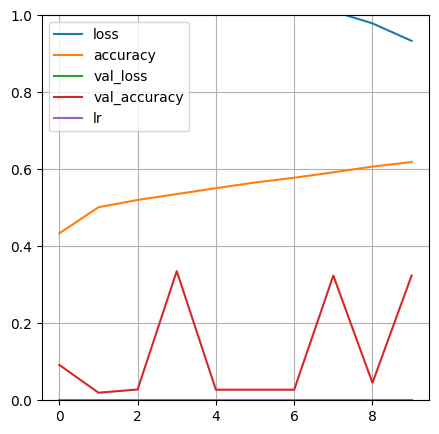

In [27]:
df = pd.DataFrame(age_his.history)
df.plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
#choose hyperparameter for gender model
age_mod = buildmodel(part=2, method_act='softmax', method_loss='mse')

batch_size = 64
epochs = 10
steps_per_epoch = x_g_train.shape[0] // batch_size
callbacks = [stop, lr]
history = age_mod.fit(x=x_g_train, y=y_g_train, batch_size=batch_size, epochs=epochs,
                      validation_data=(x_g_test, y_g_test), steps_per_epoch=steps_per_epoch, callbacks=callbacks)


Epoch 1/10
266/266 [==============================] - 71s 260ms/step - loss: 0.1370 - accuracy: 0.8021 - val_loss: 0.2476 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 2/10
266/266 [==============================] - 65s 243ms/step - loss: 0.0939 - accuracy: 0.8685 - val_loss: 0.2529 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 3/10
266/266 [==============================] - 64s 241ms/step - loss: 0.0829 - accuracy: 0.8836 - val_loss: 0.4804 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 4/10
266/266 [==============================] - 67s 250ms/step - loss: 0.0737 - accuracy: 0.8963 - val_loss: 0.4800 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 5/10
266/266 [==============================] - 71s 265ms/step - loss: 0.0691 - accuracy: 0.9023 - val_loss: 0.1984 - val_accuracy: 0.6882 - lr: 0.0010
Epoch 6/10
266/266 [==============================] - 69s 261ms/step - loss: 0.0642 - accuracy: 0.9112 - val_loss: 0.4509 - val_accuracy: 0.5214 - lr: 0.0010
Epoch 7/10
266/266 [==============================] 

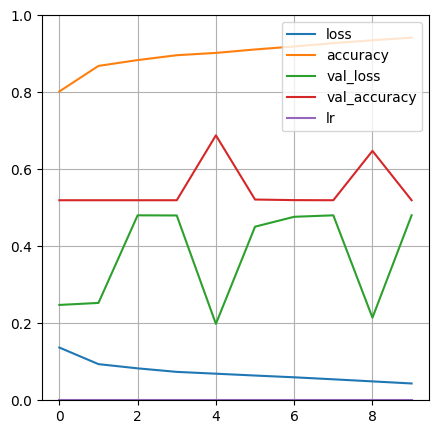

In [23]:
df = pd.DataFrame(history.history)
df.plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
gender_mod = buildmodel(2, "sigmoid", "binary_crossentropy")
gender_his = gender_mod.fit(x_g_train, y_g_train, batch_size=64,
                              epochs = 10, validation_data = (x_g_test,y_g_test), steps_per_epoch= x_g_train.shape[0] // 64, callbacks= [stop, lr])

Epoch 1/10
266/266 [==============================] - 74s 260ms/step - loss: 0.4503 - accuracy: 0.7842 - val_loss: 0.6910 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 2/10
266/266 [==============================] - 62s 234ms/step - loss: 0.3135 - accuracy: 0.8620 - val_loss: 0.8130 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 3/10
266/266 [==============================] - 63s 235ms/step - loss: 0.2730 - accuracy: 0.8794 - val_loss: 1.7040 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 4/10
266/266 [==============================] - 62s 232ms/step - loss: 0.2519 - accuracy: 0.8903 - val_loss: 0.7780 - val_accuracy: 0.7106 - lr: 0.0010
Epoch 5/10
266/266 [==============================] - 62s 233ms/step - loss: 0.2295 - accuracy: 0.9027 - val_loss: 14.0126 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 6/10
266/266 [==============================] - 61s 231ms/step - loss: 0.2065 - accuracy: 0.9100 - val_loss: 0.7205 - val_accuracy: 0.5322 - lr: 0.0010
Epoch 7/10
266/266 [==============================]

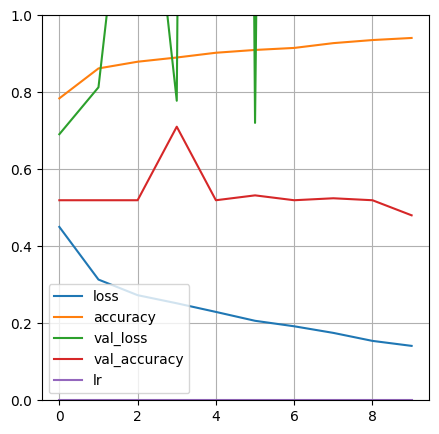

In [25]:
df = pd.DataFrame(gender_his.history)
df.plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Predicted Age: 20


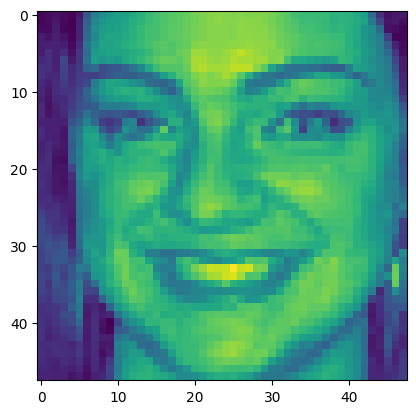

In [9]:

def test_image(ind,X,Model):

  plt.imshow(X[ind])
  # pred_1=Model.predict(np.array(X[ind]))
  #
  # age=int(np.round(pred_1))
  # print("Predicted Age: "+ str(age))


test_image(3760,x, age_mod)